**Heuristic Techniques for solving Constraint optimization
problems:**

In [2]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Implementation of Standard PSO and the hybrid PSO-GA with CEC2017 Benchmark functions**

Unimodal Functions

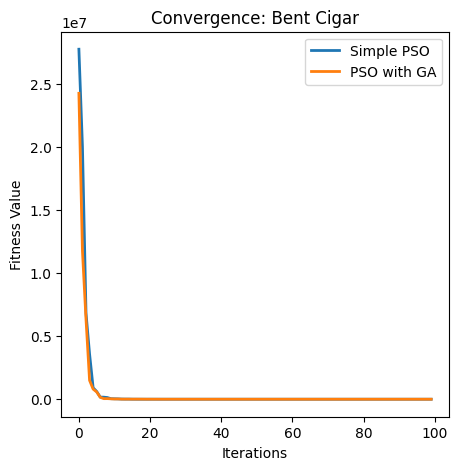

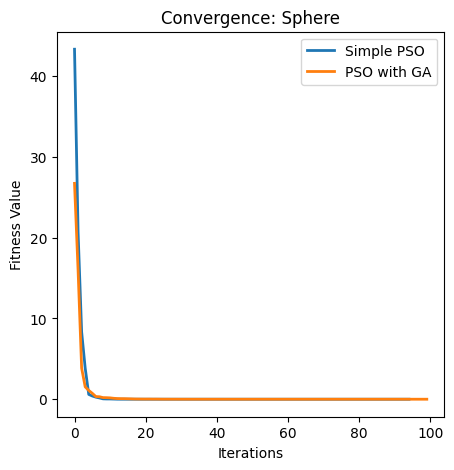

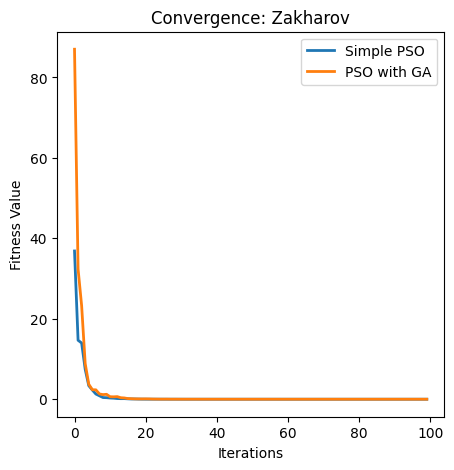

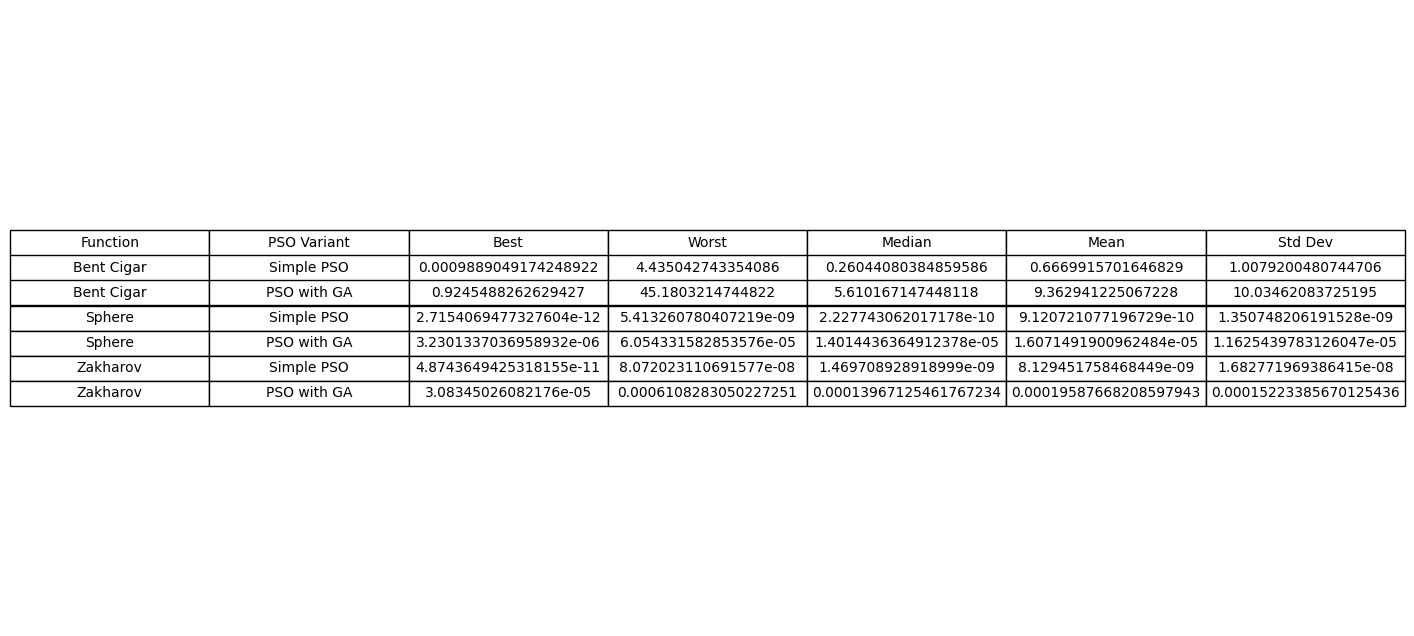

In [3]:
# Simple PSO
def simple_pso(func, x_low, x_hi, N=10, P=100, I=100, tol=1e-5, w=0.5, c1=2, c2=2):
    x_range = x_hi - x_low
    v_max = x_range * 0.1

    # Initialization
    swarm = []
    for _ in range(P):
        pos = np.random.rand(N) * x_range + x_low
        vel = (2 * np.random.rand(N) - 1) * v_max
        obj = func(pos)
        particle = {
            'pos': pos,
            'vel': vel,
            'obj': obj,
            'best_pos': pos.copy(),
            'best_obj': obj
        }
        swarm.append(particle)

    # Swarming
    global_best_pos = np.random.rand(N) * x_range + x_low
    global_best_obj = func(global_best_pos)
    history = []
    best_objs = []

    for iter in range(I):
        current_objs = np.array([particle['obj'] for particle in swarm])
        if np.all(np.abs(current_objs - np.min(current_objs)) < tol):
            break

        history.append(swarm.copy())
        best_objs.append(np.min(current_objs))

        for i in range(P):
            inertia = w * swarm[i]['vel']
            cognitive = c1 * np.random.rand() * (swarm[i]['best_pos'] - swarm[i]['pos'])
            social = c2 * np.random.rand() * (global_best_pos - swarm[i]['pos'])
            vel = inertia + cognitive + social
            swarm[i]['vel'] = np.sign(vel) * np.minimum(np.abs(vel), v_max)
            swarm[i]['pos'] += swarm[i]['vel']
            swarm[i]['obj'] = func(swarm[i]['pos'])

            if swarm[i]['obj'] < swarm[i]['best_obj']:
                swarm[i]['best_pos'] = swarm[i]['pos'].copy()
                swarm[i]['best_obj'] = swarm[i]['obj']

            if swarm[i]['obj'] < global_best_obj:
                global_best_pos = swarm[i]['pos'].copy()
                global_best_obj = swarm[i]['obj']

    return history, best_objs

# PSO with GA

def crossover(parent1, parent2):
    mask = np.random.rand(len(parent1)) > 0.5
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(~mask, parent1, parent2)
    return child1, child2

def mutate(particle, mutation_rate=0.01):
    mutation_mask = np.random.rand(len(particle)) < mutation_rate
    mutation_values = np.random.randn(len(particle))
    return particle + mutation_mask * mutation_values

def pso_with_ga(func, x_low, x_hi, N=10, P=100, I=100, tol=1e-5, w=0.5, c1=2, c2=2, crossover_prob=0.1, mutation_rate=0.01):
    x_range = x_hi - x_low
    v_max = x_range * 0.1

    # Initialization
    swarm = []
    for _ in range(P):
        pos = np.random.rand(N) * x_range + x_low
        vel = (2 * np.random.rand(N) - 1) * v_max
        obj = func(pos)
        particle = {
            'pos': pos,
            'vel': vel,
            'obj': obj,
            'best_pos': pos.copy(),
            'best_obj': obj
        }
        swarm.append(particle)

    # Swarming
    global_best_pos = np.random.rand(N) * x_range + x_low
    global_best_obj = func(global_best_pos)
    history = []
    best_objs = []

    for iter in range(I):
        current_objs = np.array([particle['obj'] for particle in swarm])
        if np.all(np.abs(current_objs - np.min(current_objs)) < tol):
            break

        history.append(swarm.copy())
        best_objs.append(np.min(current_objs))

        for i in range(P):
            inertia = w * swarm[i]['vel']
            cognitive = c1 * np.random.rand() * (swarm[i]['best_pos'] - swarm[i]['pos'])
            social = c2 * np.random.rand() * (global_best_pos - swarm[i]['pos'])
            vel = inertia + cognitive + social
            swarm[i]['vel'] = np.sign(vel) * np.minimum(np.abs(vel), v_max)
            swarm[i]['pos'] += swarm[i]['vel']
            swarm[i]['obj'] = func(swarm[i]['pos'])

            if swarm[i]['obj'] < swarm[i]['best_obj']:
                swarm[i]['best_pos'] = swarm[i]['pos'].copy()
                swarm[i]['best_obj'] = swarm[i]['obj']

            if swarm[i]['obj'] < global_best_obj:
                global_best_pos = swarm[i]['pos'].copy()
                global_best_obj = swarm[i]['obj']

        # Crossover step
        for i in range(P // 2):
            if np.random.rand() < crossover_prob:
                parent1 = swarm[np.random.randint(P)]['pos']
                parent2 = swarm[np.random.randint(P)]['pos']
                child1, child2 = crossover(parent1, parent2)
                swarm[np.random.randint(P)]['pos'] = child1
                swarm[np.random.randint(P)]['pos'] = child2

        # Mutation step
        for i in range(P):
            swarm[i]['pos'] = mutate(swarm[i]['pos'], mutation_rate)

    return history, best_objs

# Define the benchmark functions with optimization values
def bent_cigar(x):
    return x[0]**2 + 1e6 * np.sum(x[1:]**2)

def sphere(x):
    return np.sum(x**2)

def zakharov(x):
    term1 = np.sum(x**2)
    term2 = np.sum(0.5 * np.arange(1, len(x) + 1) * x)
    return term1 + term2**2 + term2**4

# Define the optimization parameters
functions = {
    "Bent Cigar": (bent_cigar, np.full(10, -5), np.full(10, 5)),
    "Sphere": (sphere, np.full(10, -5), np.full(10, 5)),
    "Zakharov": (zakharov, np.full(10, -5), np.full(10, 5))
}

# Optimization settings
N = 10  # Dimension of the problem
P = 100 # Number of particles
I = 100 # Number of iterations
runs = 30 # Number of runs for statistical analysis

# Collect performance metrics
metrics = {
    "Function": [],
    "PSO Variant": [],
    "Best": [],
    "Worst": [],
    "Median": [],
    "Mean": [],
    "Std Dev": []
}

for name, (func, x_low, x_hi) in functions.items():
    simple_results = []
    ga_results = []

    for _ in range(runs):
        _, simple_best_objs = simple_pso(func, x_low, x_hi, N=N, P=P, I=I)
        _, ga_best_objs = pso_with_ga(func, x_low, x_hi, N=N, P=P, I=I, c1=2, c2=2)

        simple_results.append(simple_best_objs[-1])
        ga_results.append(ga_best_objs[-1])

    # Simple PSO metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("Simple PSO")
    metrics["Best"].append(np.min(simple_results))
    metrics["Worst"].append(np.max(simple_results))
    metrics["Median"].append(np.median(simple_results))
    metrics["Mean"].append(np.mean(simple_results))
    metrics["Std Dev"].append(np.std(simple_results))

    # PSO with GA metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("PSO with GA")
    metrics["Best"].append(np.min(ga_results))
    metrics["Worst"].append(np.max(ga_results))
    metrics["Median"].append(np.median(ga_results))
    metrics["Mean"].append(np.mean(ga_results))
    metrics["Std Dev"].append(np.std(ga_results))

    # Plot convergence for one run

    plt.figure(figsize=(5, 5))
    plt.plot(simple_best_objs, label="Simple PSO",linewidth=2)
    plt.plot(ga_best_objs, label="PSO with GA",linewidth=2)
    plt.xlabel('Iterations')
    plt.ylabel('Fitness Value')
    plt.title(f'Convergence: {name}')
    plt.legend()
    plt.grid(False)
    plt.show()

# Convert results to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc = 'center', loc='center')

# Adjust font size and scale for better readability
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.show()

**Multimodal Functions**

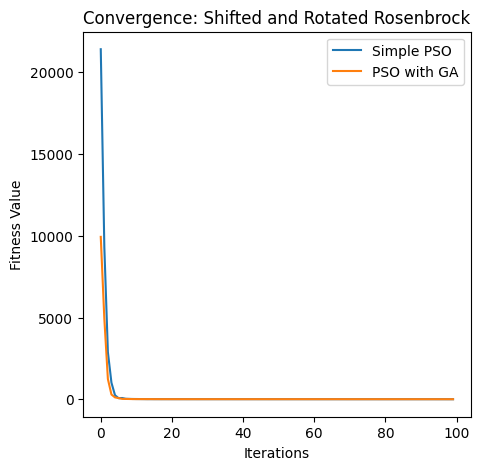

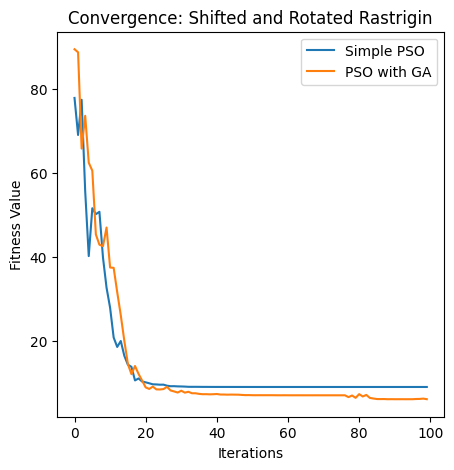

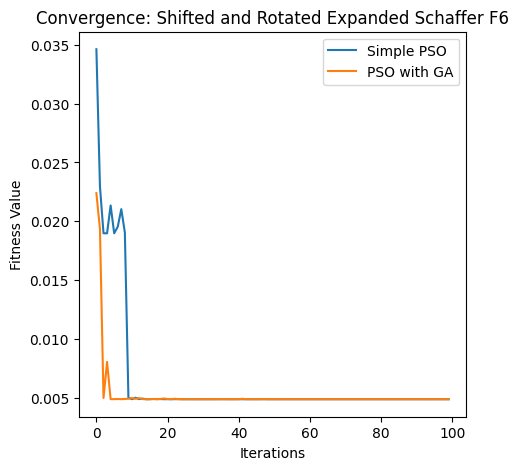

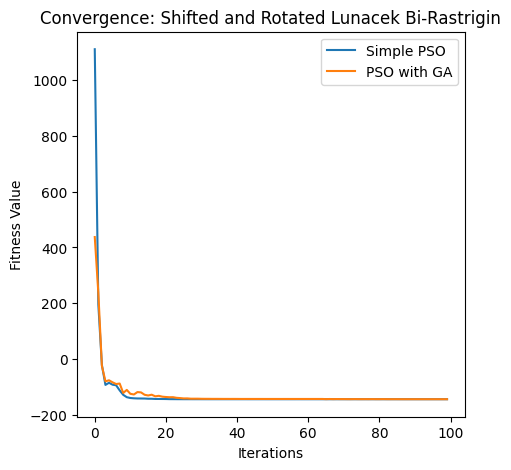

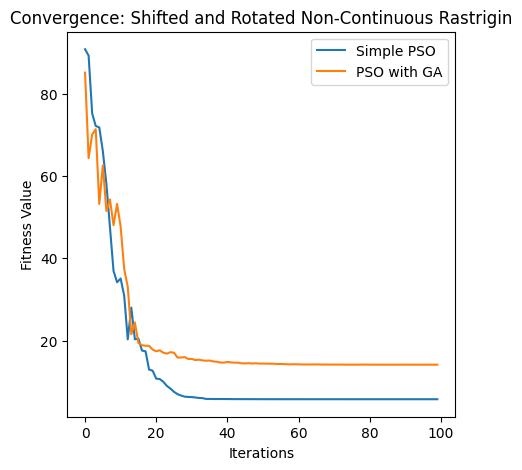

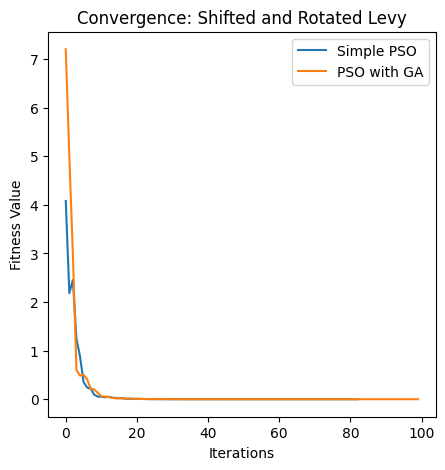

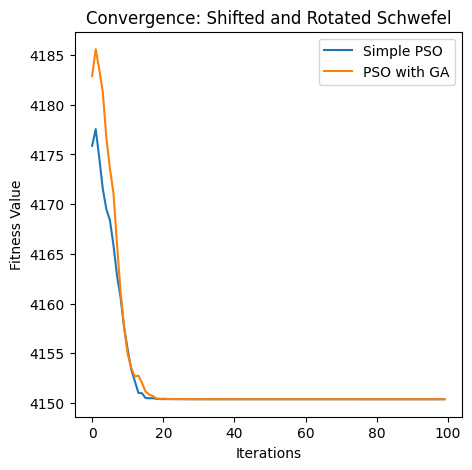

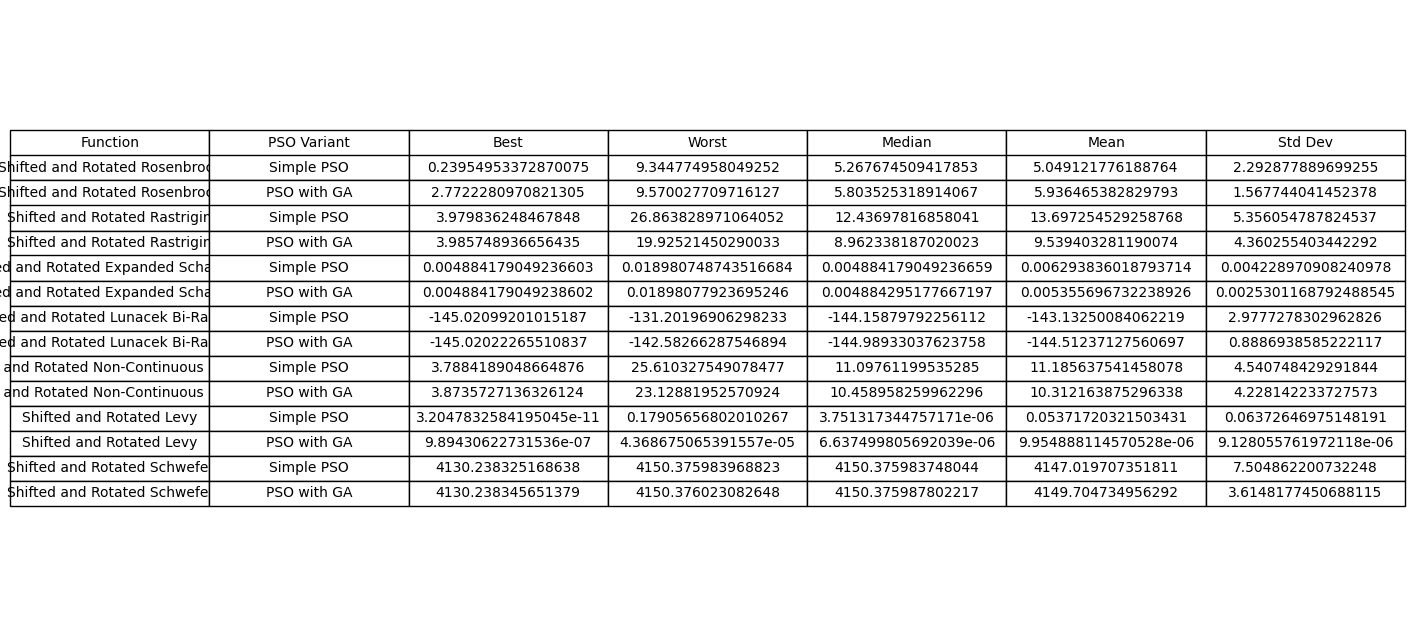

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the multimodal benchmark functions

def shifted_rotated_rosenbrock(x, shift=1, rotation_matrix=None):
    if rotation_matrix is None:
        rotation_matrix = np.eye(len(x))
    x_shifted = x - shift
    x_rotated = np.dot(rotation_matrix, x_shifted)
    return np.sum(100 * (x_rotated[1:] - x_rotated[:-1]**2)**2 + (x_rotated[:-1] - 1)**2)

def shifted_rotated_rastrigin(x, shift=1, rotation_matrix=None):
    if rotation_matrix is None:
        rotation_matrix = np.eye(len(x))
    x_shifted = x - shift
    x_rotated = np.dot(rotation_matrix, x_shifted)
    return 10 * len(x) + np.sum(x_rotated**2 - 10 * np.cos(2 * np.pi * x_rotated))

def shifted_rotated_schaffer_f6(x, shift=1, rotation_matrix=None):
    if rotation_matrix is None:
        rotation_matrix = np.eye(len(x))
    x_shifted = x - shift
    x_rotated = np.dot(rotation_matrix, x_shifted)
    return 0.5 + (np.sin(np.sqrt(np.sum(x_rotated**2)))**2 - 0.5) / (1 + 0.001 * np.sum(x_rotated**2))

def shifted_rotated_lunacek_bi_rastrigin(x, shift=1, rotation_matrix=None):
    if rotation_matrix is None:
        rotation_matrix = np.eye(len(x))
    x_shifted = x - shift
    x_rotated = np.dot(rotation_matrix, x_shifted)
    term1 = np.sum(x_rotated**2)
    term2 = np.sum(x_rotated**2 - 10 * np.cos(2 * np.pi * x_rotated))
    return 2 * (term1**2 - 10 * term1) + term2

def shifted_rotated_non_cont_rastrigin(x, shift=1, rotation_matrix=None):
    if rotation_matrix is None:
        rotation_matrix = np.eye(len(x))
    x_shifted = x - shift
    x_rotated = np.dot(rotation_matrix, x_shifted)
    return 10 * len(x) + np.sum(x_rotated**2 - 10 * np.cos(2 * np.pi * x_rotated)) + np.sum(x_rotated**2 * np.sin(2 * np.pi * x_rotated))

def shifted_rotated_levy(x, shift=1, rotation_matrix=None):
    if rotation_matrix is None:
        rotation_matrix = np.eye(len(x))
    x_shifted = x - shift
    x_rotated = np.dot(rotation_matrix, x_shifted)
    w = 1 + (x_rotated - 1) / 4
    term1 = np.sin(np.pi * w[0])**2
    term2 = np.sum((w[:-1] - 1)**2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1)**2))
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)
    return term1 + term2 + term3

def shifted_rotated_schwefel(x, shift=1, rotation_matrix=None):
    if rotation_matrix is None:
        rotation_matrix = np.eye(len(x))
    x_shifted = x - shift
    x_rotated = np.dot(rotation_matrix, x_shifted)
    return 418.9829 * len(x) - np.sum(x_rotated * np.sin(np.sqrt(np.abs(x_rotated))))

# Define PSO and GA functions
def simple_pso(func, x_low, x_hi, N=10, P=100, I=100, tol=1e-5, w=0.5, c1=2, c2=2):
    x_range = x_hi - x_low
    v_max = x_range * 0.1

    # Initialization
    swarm = []
    for _ in range(P):
        pos = np.random.rand(N) * x_range + x_low
        vel = (2 * np.random.rand(N) - 1) * v_max
        obj = func(pos)
        particle = {
            'pos': pos,
            'vel': vel,
            'obj': obj,
            'best_pos': pos.copy(),
            'best_obj': obj
        }
        swarm.append(particle)

    # Swarming
    global_best_pos = np.random.rand(N) * x_range + x_low
    global_best_obj = func(global_best_pos)
    history = []
    best_objs = []

    for iter in range(I):
        current_objs = np.array([particle['obj'] for particle in swarm])
        if np.all(np.abs(current_objs - np.min(current_objs)) < tol):
            break

        history.append(swarm.copy())
        best_objs.append(np.min(current_objs))

        for i in range(P):
            inertia = w * swarm[i]['vel']
            cognitive = c1 * np.random.rand() * (swarm[i]['best_pos'] - swarm[i]['pos'])
            social = c2 * np.random.rand() * (global_best_pos - swarm[i]['pos'])
            vel = inertia + cognitive + social
            swarm[i]['vel'] = np.sign(vel) * np.minimum(np.abs(vel), v_max)
            swarm[i]['pos'] += swarm[i]['vel']
            swarm[i]['obj'] = func(swarm[i]['pos'])

            if swarm[i]['obj'] < swarm[i]['best_obj']:
                swarm[i]['best_pos'] = swarm[i]['pos'].copy()
                swarm[i]['best_obj'] = swarm[i]['obj']

            if swarm[i]['obj'] < global_best_obj:
                global_best_pos = swarm[i]['pos'].copy()
                global_best_obj = swarm[i]['obj']

    return history, best_objs

def crossover(parent1, parent2):
    mask = np.random.rand(len(parent1)) > 0.5
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(~mask, parent1, parent2)
    return child1, child2

def mutate(particle, mutation_rate=0.01):
    mutation_mask = np.random.rand(len(particle)) < mutation_rate
    mutation_values = np.random.randn(len(particle))
    return particle + mutation_mask * mutation_values

def pso_with_ga(func, x_low, x_hi, N=10, P=100, I=100, tol=1e-5, w=0.5, c1=2, c2=2, crossover_prob=0.1, mutation_rate=0.01):
    x_range = x_hi - x_low
    v_max = x_range * 0.1

    # Initialization
    swarm = []
    for _ in range(P):
        pos = np.random.rand(N) * x_range + x_low
        vel = (2 * np.random.rand(N) - 1) * v_max
        obj = func(pos)
        particle = {
            'pos': pos,
            'vel': vel,
            'obj': obj,
            'best_pos': pos.copy(),
            'best_obj': obj
        }
        swarm.append(particle)

    # Swarming
    global_best_pos = np.random.rand(N) * x_range + x_low
    global_best_obj = func(global_best_pos)
    history = []
    best_objs = []

    for iter in range(I):
        current_objs = np.array([particle['obj'] for particle in swarm])
        if np.all(np.abs(current_objs - np.min(current_objs)) < tol):
            break

        history.append(swarm.copy())
        best_objs.append(np.min(current_objs))

        for i in range(P):
            inertia = w * swarm[i]['vel']
            cognitive = c1 * np.random.rand() * (swarm[i]['best_pos'] - swarm[i]['pos'])
            social = c2 * np.random.rand() * (global_best_pos - swarm[i]['pos'])
            vel = inertia + cognitive + social
            swarm[i]['vel'] = np.sign(vel) * np.minimum(np.abs(vel), v_max)
            swarm[i]['pos'] += swarm[i]['vel']
            swarm[i]['obj'] = func(swarm[i]['pos'])

            if swarm[i]['obj'] < swarm[i]['best_obj']:
                swarm[i]['best_pos'] = swarm[i]['pos'].copy()
                swarm[i]['best_obj'] = swarm[i]['obj']

            if swarm[i]['obj'] < global_best_obj:
                global_best_pos = swarm[i]['pos'].copy()
                global_best_obj = swarm[i]['obj']

        # Crossover step
        for i in range(P // 2):
            if np.random.rand() < crossover_prob:
                parent1 = swarm[np.random.randint(P)]['pos']
                parent2 = swarm[np.random.randint(P)]['pos']
                child1, child2 = crossover(parent1, parent2)
                swarm[np.random.randint(P)]['pos'] = child1
                swarm[np.random.randint(P)]['pos'] = child2

        # Mutation step
        for i in range(P):
            swarm[i]['pos'] = mutate(swarm[i]['pos'], mutation_rate)

    return history, best_objs

# Define the optimization parameters
functions = {
    "Shifted and Rotated Rosenbrock": (shifted_rotated_rosenbrock, np.full(10, -5), np.full(10, 5)),
    "Shifted and Rotated Rastrigin": (shifted_rotated_rastrigin, np.full(10, -5), np.full(10, 5)),
    "Shifted and Rotated Expanded Schaffer F6": (shifted_rotated_schaffer_f6, np.full(10, -5), np.full(10, 5)),
    "Shifted and Rotated Lunacek Bi-Rastrigin": (shifted_rotated_lunacek_bi_rastrigin, np.full(10, -5), np.full(10, 5)),
    "Shifted and Rotated Non-Continuous Rastrigin": (shifted_rotated_non_cont_rastrigin, np.full(10, -5), np.full(10, 5)),
    "Shifted and Rotated Levy": (shifted_rotated_levy, np.full(10, -5), np.full(10, 5)),
    "Shifted and Rotated Schwefel": (shifted_rotated_schwefel, np.full(10, -5), np.full(10, 5))
}

# Optimization settings
N = 10  # Dimension of the problem
P = 100 # Number of particles
I = 100 # Number of iterations
runs = 30 # Number of runs for statistical analysis

# Collect performance metrics
metrics = {
    "Function": [],
    "PSO Variant": [],
    "Best": [],
    "Worst": [],
    "Median": [],
    "Mean": [],
    "Std Dev": []
}

for name, (func, x_low, x_hi) in functions.items():
    simple_results = []
    ga_results = []

    for _ in range(runs):
        _, simple_best_objs = simple_pso(func, x_low, x_hi, N=N, P=P, I=I)
        _, ga_best_objs = pso_with_ga(func, x_low, x_hi, N=N, P=P, I=I, c1=2, c2=2)

        simple_results.append(simple_best_objs[-1])
        ga_results.append(ga_best_objs[-1])

    # Simple PSO metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("Simple PSO")
    metrics["Best"].append(np.min(simple_results))
    metrics["Worst"].append(np.max(simple_results))
    metrics["Median"].append(np.median(simple_results))
    metrics["Mean"].append(np.mean(simple_results))
    metrics["Std Dev"].append(np.std(simple_results))

    # PSO with GA metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("PSO with GA")
    metrics["Best"].append(np.min(ga_results))
    metrics["Worst"].append(np.max(ga_results))
    metrics["Median"].append(np.median(ga_results))
    metrics["Mean"].append(np.mean(ga_results))
    metrics["Std Dev"].append(np.std(ga_results))

    # Plot convergence for one run
    plt.figure(figsize=(5, 5))
    plt.plot(simple_best_objs, label="Simple PSO")
    plt.plot(ga_best_objs, label="PSO with GA")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness Value')
    plt.title(f'Convergence: {name}')
    plt.legend()
    plt.grid(False)
    plt.show()

# Convert results to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

# Adjust font size and scale for better readability
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.show()


**Hybrid Functions**

In [9]:
def zakharov(x):
    sum1 = np.sum(x**2)
    sum2 = np.sum(0.5 * np.arange(1, len(x) + 1) * x)
    return sum1 + sum2**2 + sum2**4

def high_conditioned_elliptic(x):
    return np.sum((10**6)**(np.arange(len(x)) / (len(x) - 1)) * x**2)

def modified_schwefel(x):
    return 418.9829 * len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def bent_cigar(x):
    return x[0]**2 + 10**6 * np.sum(x[1:]**2)

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2))) - np.exp(np.mean(np.cos(2 * np.pi * x))) + 20 + np.e

def schaffer_f7(x):
    return np.sum(np.sqrt(x[:-1]**2 + x[1:]**2) + np.sin(50 * np.sqrt(x[:-1]**2 + x[1:]**2))**2)

def expanded_griewank_plus_rosenbrock(x):
    return np.sum(100 * (x[:-1]**2 - x[1:])**2 + (x[:-1] - 1)**2) / 4000 - np.prod(np.cos((x - 1) / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def katsuura(x):
    d = len(x)
    prod = np.prod(1 + (np.arange(1, d + 1) * (np.abs(2**(np.arange(1, d + 1) * x) - np.floor(2**(np.arange(1, d + 1) * x) + 0.5)))**(1.0 / np.arange(1, d + 1))))
    return prod * (10 / d)**(10**0.5) - 10 / d**(10**0.5)

def happycat(x):
    alpha = 1 / 8
    norm = np.linalg.norm(x)
    return ((norm**2 - len(x))**2)**alpha + (0.5 * norm**2 + np.sum(x)) / len(x) + 0.5

def weierstrass(x):
    a = 0.5
    b = 3
    kmax = 20
    term1 = np.sum([np.sum(a**k * np.cos(2 * np.pi * b**k * (x + 0.5))) for k in range(kmax + 1)], axis=0)
    term2 = len(x) * np.sum(a**k * np.cos(2 * np.pi * b**k * 0.5) for k in range(kmax + 1))
    return term1 - term2

def hgbat(x):
    return np.sum(np.abs(x)**0.5) + np.prod(np.abs(x)**0.5)

def discus(x):
    return 10**6 * x[0]**2 + np.sum(x[1:]**2)

# Composite Functions (f11 to f20)
def composite_function(funcs, weights, x):
    return sum(w * f(x) for w, f in zip(weights, funcs))

# Define composite functions
composite_funcs = {
    "f11": ([zakharov, shifted_rotated_rosenbrock, shifted_rotated_rastrigin], [1, 1, 1]),
    "f12": ([high_conditioned_elliptic, modified_schwefel, bent_cigar], [1, 1, 1]),
    "f13": ([bent_cigar, shifted_rotated_rosenbrock, shifted_rotated_lunacek_bi_rastrigin], [1, 1, 1]),
    "f14": ([high_conditioned_elliptic, ackley, schaffer_f7, shifted_rotated_rastrigin], [1, 1, 1, 1]),
    "f15": ([bent_cigar, hgbat, shifted_rotated_rastrigin, shifted_rotated_rosenbrock], [1, 1, 1, 1]),
    "f16": ([shifted_rotated_schaffer_f6, hgbat, shifted_rotated_rosenbrock, modified_schwefel], [1, 1, 1, 1]),
    "f17": ([katsuura, ackley, expanded_griewank_plus_rosenbrock, shifted_rotated_schwefel, shifted_rotated_rastrigin], [1, 1, 1, 1, 1]),
    "f18": ([high_conditioned_elliptic, ackley, shifted_rotated_rastrigin, hgbat, discus], [1, 1, 1, 1, 1]),
    "f19": ([bent_cigar, shifted_rotated_rastrigin, expanded_griewank_plus_rosenbrock, weierstrass, shifted_rotated_schaffer_f6], [1, 1, 1, 1, 1]),
    "f20": ([happycat, katsuura, ackley, shifted_rotated_rastrigin, modified_schwefel, schaffer_f7], [1, 1, 1, 1, 1, 1])
}


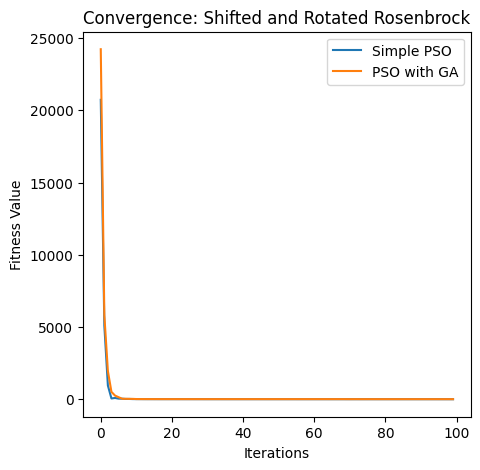

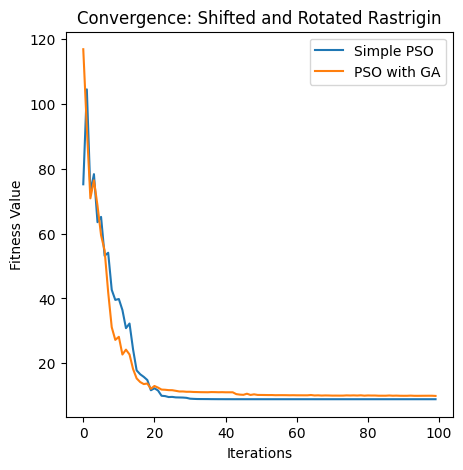

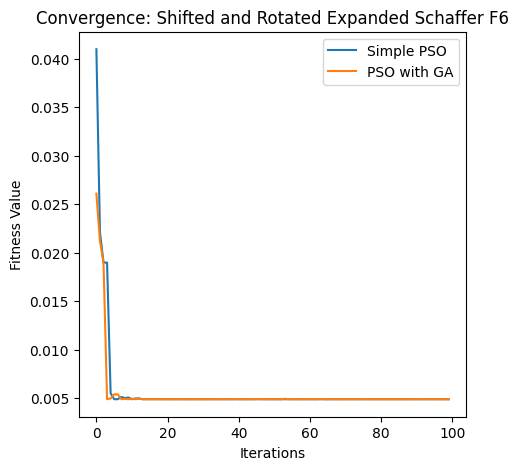

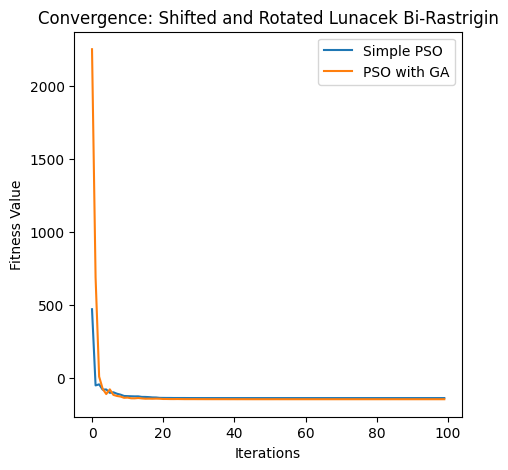

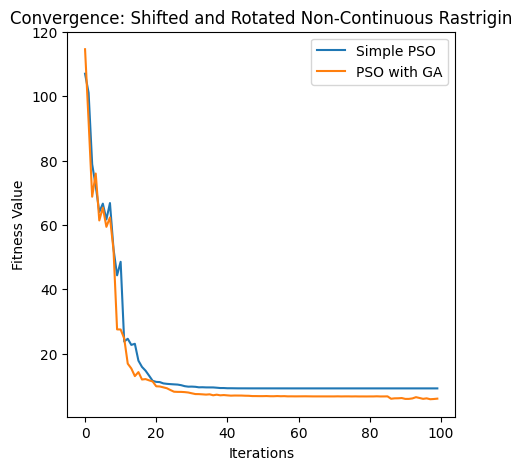

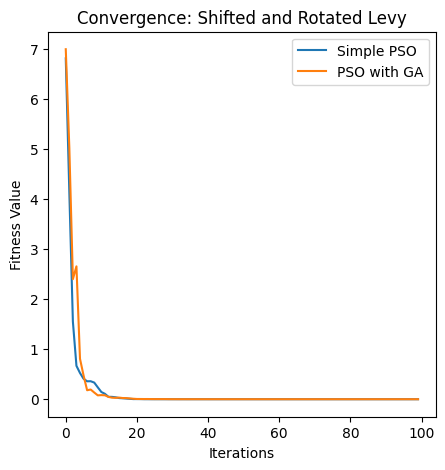

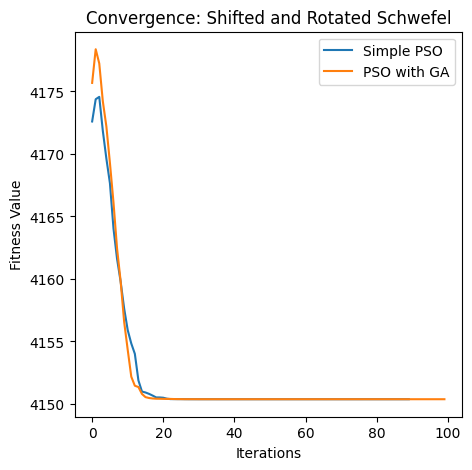

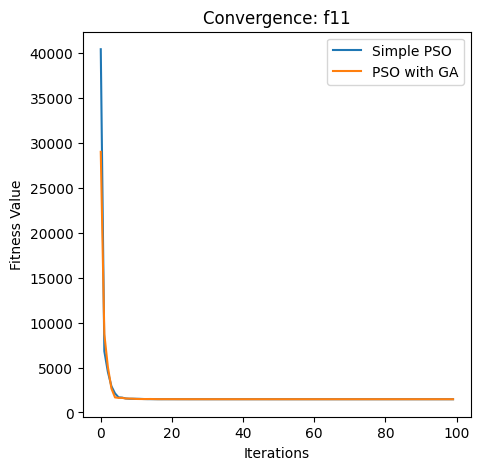

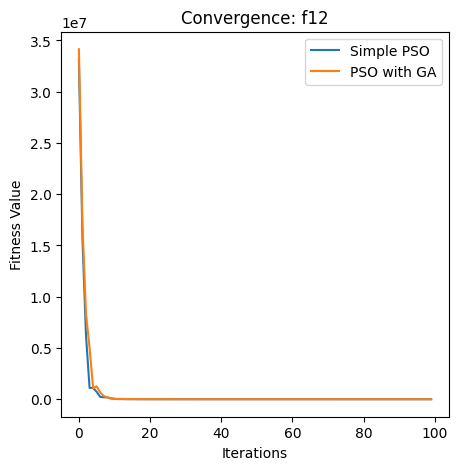

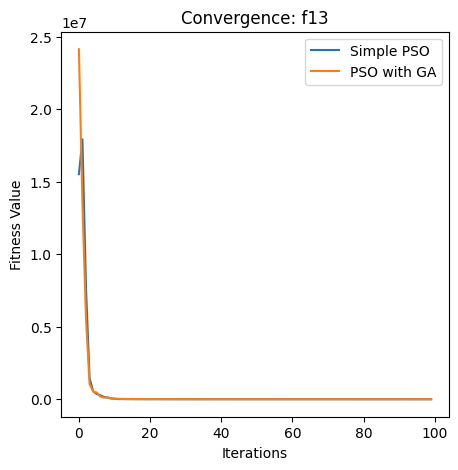

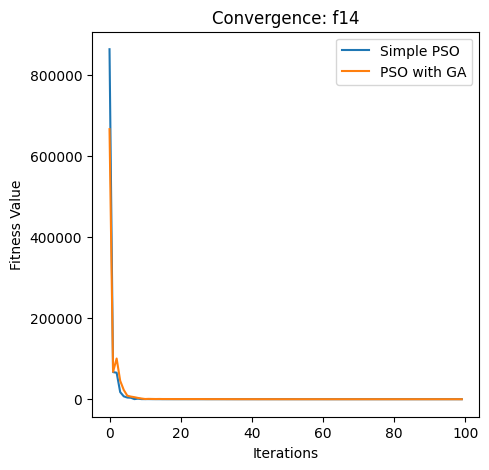

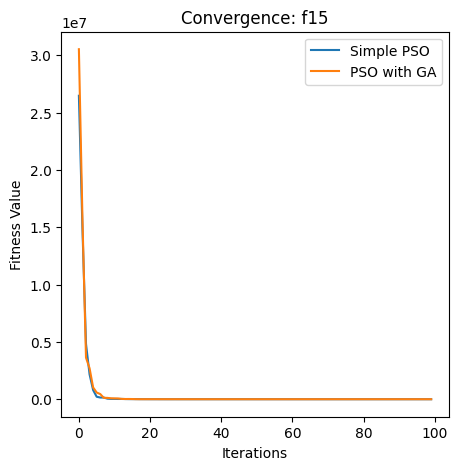

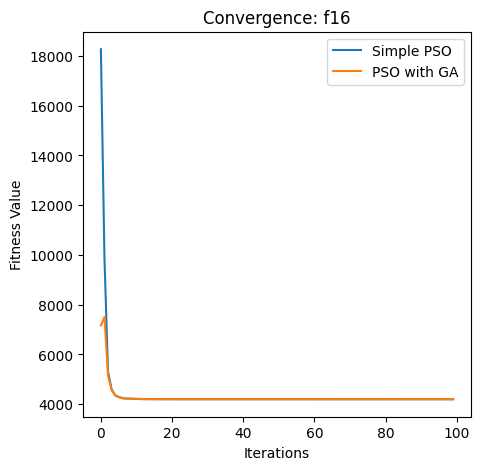

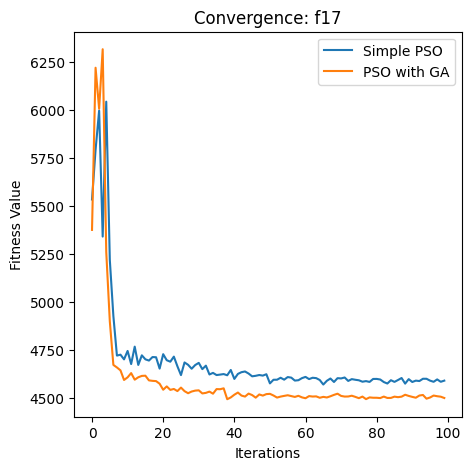

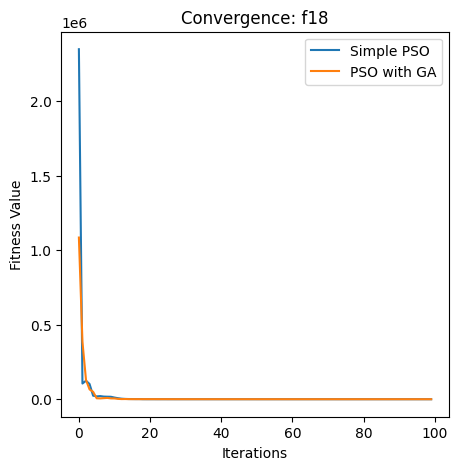

<ipython-input-9-b93f0a57d231>:39: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  term2 = len(x) * np.sum(a**k * np.cos(2 * np.pi * b**k * 0.5) for k in range(kmax + 1))


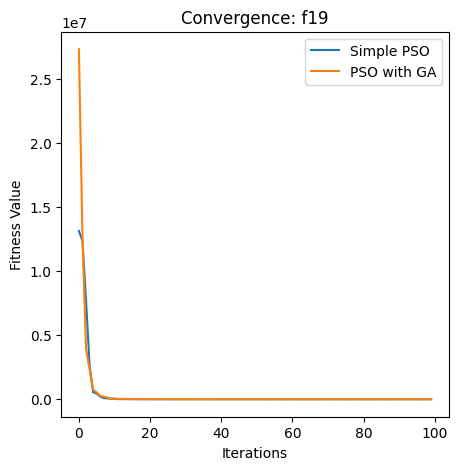

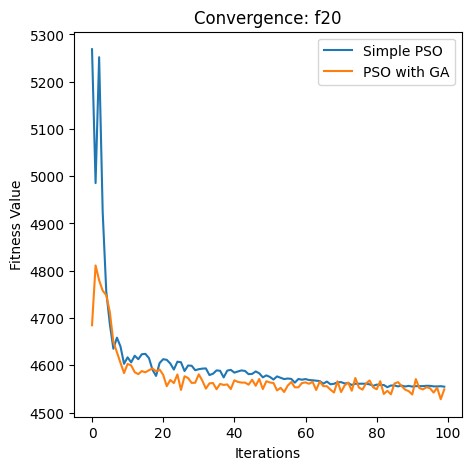

<bound method Table.auto_set_font_size of <matplotlib.table.Table object at 0x7acca162f400>>

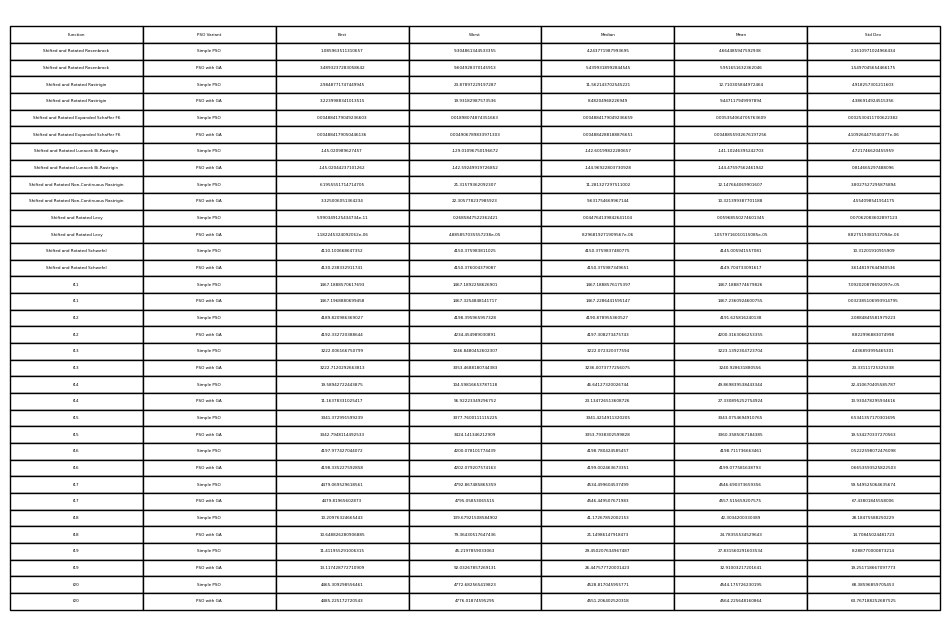

In [10]:
# Update functions dictionary with composite functions
for name, (funcs, weights) in composite_funcs.items():
    functions[name] = (lambda x, funcs=funcs, weights=weights: composite_function(funcs, weights, x), np.full(10, -5), np.full(10, 5))

# Optimization settings remain the same
N = 10  # Dimension of the problem
P = 100 # Number of particles
I = 100 # Number of iterations
runs = 30 # Number of runs for statistical analysis

# Collect performance metrics
metrics = {
    "Function": [],
    "PSO Variant": [],
    "Best": [],
    "Worst": [],
    "Median": [],
    "Mean": [],
    "Std Dev": []
}

for name, (func, x_low, x_hi) in functions.items():
    simple_results = []
    ga_results = []

    for _ in range(runs):
        _, simple_best_objs = simple_pso(func, x_low, x_hi, N=N, P=P, I=I)
        _, ga_best_objs = pso_with_ga(func, x_low, x_hi, N=N, P=P, I=I, c1=2, c2=2)

        simple_results.append(simple_best_objs[-1])
        ga_results.append(ga_best_objs[-1])

    # Simple PSO metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("Simple PSO")
    metrics["Best"].append(np.min(simple_results))
    metrics["Worst"].append(np.max(simple_results))
    metrics["Median"].append(np.median(simple_results))
    metrics["Mean"].append(np.mean(simple_results))
    metrics["Std Dev"].append(np.std(simple_results))

    # PSO with GA metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("PSO with GA")
    metrics["Best"].append(np.min(ga_results))
    metrics["Worst"].append(np.max(ga_results))
    metrics["Median"].append(np.median(ga_results))
    metrics["Mean"].append(np.mean(ga_results))
    metrics["Std Dev"].append(np.std(ga_results))

    # Plot convergence for one run
    plt.figure(figsize=(5, 5))
    plt.plot(simple_best_objs, label="Simple PSO")
    plt.plot(ga_best_objs, label="PSO with GA")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness Value')
    plt.title(f'Convergence: {name}')
    plt.legend()
    plt.grid(False)
    plt.show()

# Convert results to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

# Adjust font size and scale for better readability
table.auto_set_font_size


**Composite Functions**

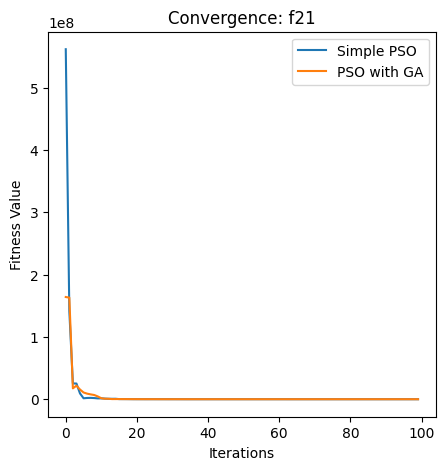

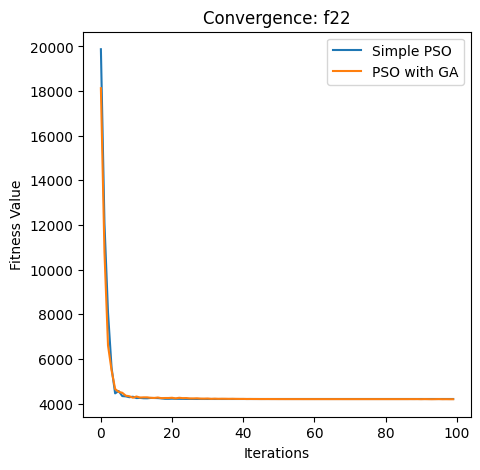

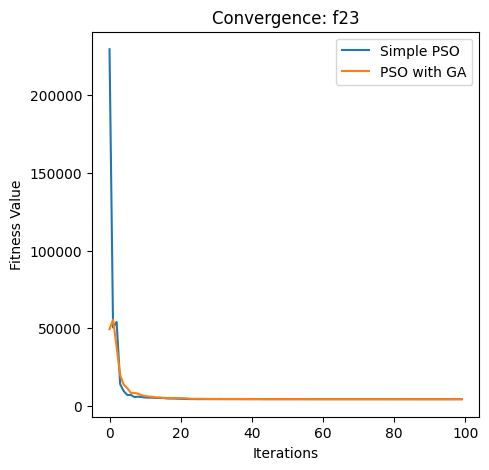

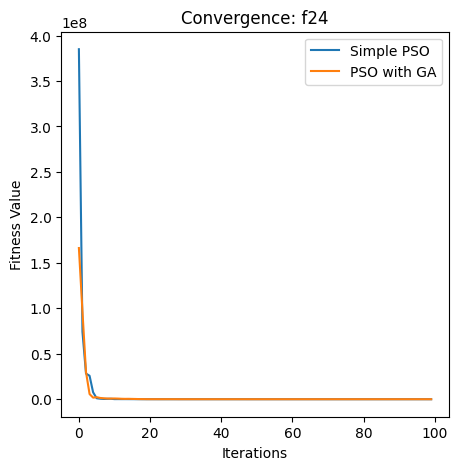

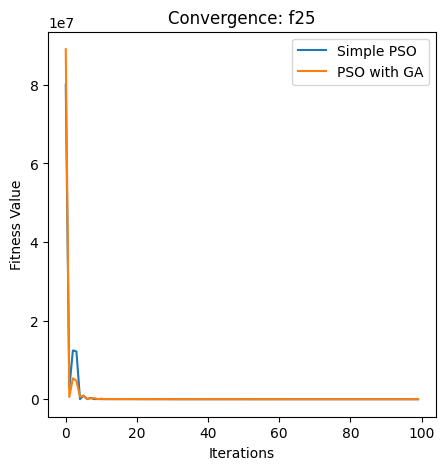

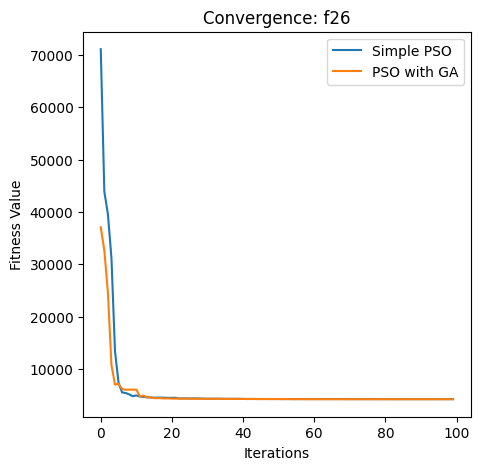

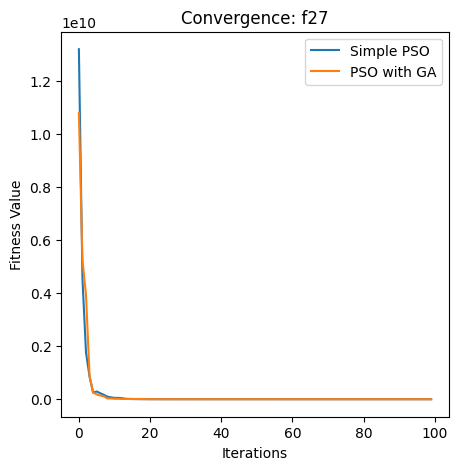

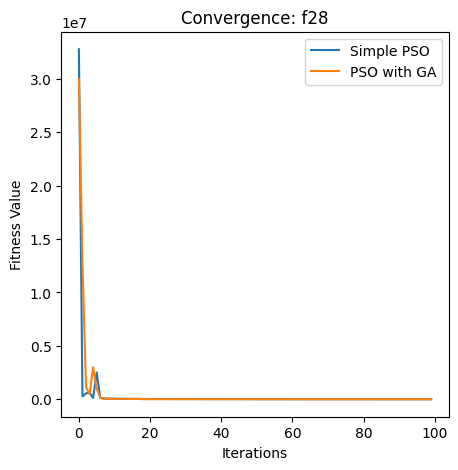

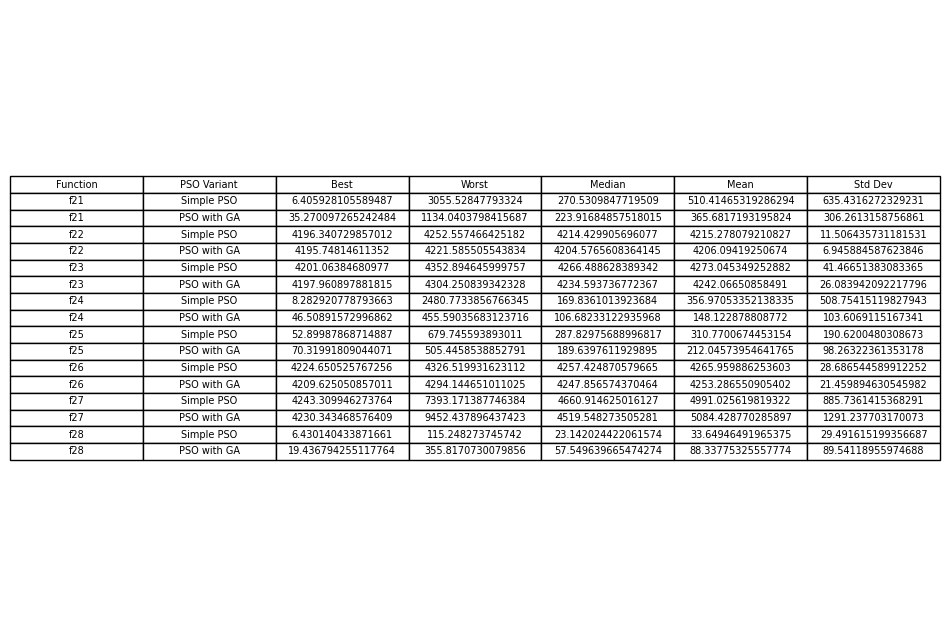

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Base functions
def zakharov(x):
    sum1 = np.sum(x**2)
    sum2 = np.sum(0.5 * np.arange(1, len(x) + 1) * x)
    return sum1 + sum2**2 + sum2**4

def high_conditioned_elliptic(x):
    return np.sum((10**6)**(np.arange(len(x)) / (len(x) - 1)) * x**2)

def modified_schwefel(x):
    return 418.9829 * len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def bent_cigar(x):
    return x[0]**2 + 10**6 * np.sum(x[1:]**2)

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2))) - np.exp(np.mean(np.cos(2 * np.pi * x))) + 20 + np.e

def schaffer_f7(x):
    return np.sum(np.sqrt(x[:-1]**2 + x[1:]**2) + np.sin(50 * np.sqrt(x[:-1]**2 + x[1:]**2))**2)

def expanded_griewank_plus_rosenbrock(x):
    return np.sum(100 * (x[:-1]**2 - x[1:])**2 + (x[:-1] - 1)**2) / 4000 - np.prod(np.cos((x - 1) / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def katsuura(x):
    d = len(x)
    prod = np.prod(1 + (np.arange(1, d + 1) * (np.abs(2**(np.arange(1, d + 1) * x) - np.floor(2**(np.arange(1, d + 1) * x) + 0.5)))**(1.0 / np.arange(1, d + 1))))
    return prod * (10 / d)**(10**0.5) - 10 / d**(10**0.5)

def happycat(x):
    alpha = 1 / 8
    norm = np.linalg.norm(x)
    return ((norm**2 - len(x))**2)**alpha + (0.5 * norm**2 + np.sum(x)) / len(x) + 0.5

def weierstrass(x):
    a = 0.5
    b = 3
    kmax = 20
    term1 = np.sum([np.sum(a**k * np.cos(2 * np.pi * b**k * (x + 0.5))) for k in range(kmax + 1)], axis=0)
    term2 = len(x) * np.sum(a**k * np.cos(2 * np.pi * b**k * 0.5) for k in range(kmax + 1))
    return term1 - term2

def hgbat(x):
    return np.sum(np.abs(x)**0.5) + np.prod(np.abs(x)**0.5)

def discus(x):
    return 10**6 * x[0]**2 + np.sum(x[1:]**2)

def rastrigin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def griewank(x):
    return 1 + np.sum(x**2 / 4000) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))

# Composite function implementation
def composite_function(funcs, x):
    return sum(f(x) for f in funcs)

# Define composite functions
composite_functions = {
    "f21": lambda x: composite_function([zakharov, high_conditioned_elliptic, rastrigin], x),
    "f22": lambda x: composite_function([rastrigin, griewank, modified_schwefel], x),
    "f23": lambda x: composite_function([zakharov, ackley, modified_schwefel, rastrigin], x),
    "f24": lambda x: composite_function([ackley, high_conditioned_elliptic, griewank, rastrigin], x),
    "f25": lambda x: composite_function([rastrigin, happycat, ackley, discus, zakharov], x),
    "f26": lambda x: composite_function([schaffer_f7, modified_schwefel, griewank, zakharov, rastrigin], x),
    "f27": lambda x: composite_function([hgbat, rastrigin, modified_schwefel, bent_cigar, high_conditioned_elliptic, schaffer_f7], x),
    "f28": lambda x: composite_function([ackley, griewank, discus, zakharov, happycat, schaffer_f7], x),
}

# Simple PSO
def simple_pso(func, x_low, x_hi, N=10, P=100, I=100, tol=1e-5, w=0.5, c1=2, c2=2):
    x_range = x_hi - x_low
    v_max = x_range * 0.1

    # Initialization
    swarm = []
    for _ in range(P):
        pos = np.random.rand(N) * x_range + x_low
        vel = (2 * np.random.rand(N) - 1) * v_max
        obj = func(pos)
        particle = {
            'pos': pos,
            'vel': vel,
            'obj': obj,
            'best_pos': pos.copy(),
            'best_obj': obj
        }
        swarm.append(particle)

    # Swarming
    global_best_pos = np.random.rand(N) * x_range + x_low
    global_best_obj = func(global_best_pos)
    history = []
    best_objs = []

    for iter in range(I):
        current_objs = np.array([particle['obj'] for particle in swarm])
        if np.all(np.abs(current_objs - np.min(current_objs)) < tol):
            break

        history.append(swarm.copy())
        best_objs.append(np.min(current_objs))

        for i in range(P):
            inertia = w * swarm[i]['vel']
            cognitive = c1 * np.random.rand() * (swarm[i]['best_pos'] - swarm[i]['pos'])
            social = c2 * np.random.rand() * (global_best_pos - swarm[i]['pos'])
            vel = inertia + cognitive + social
            swarm[i]['vel'] = np.sign(vel) * np.minimum(np.abs(vel), v_max)
            swarm[i]['pos'] += swarm[i]['vel']
            swarm[i]['obj'] = func(swarm[i]['pos'])

            if swarm[i]['obj'] < swarm[i]['best_obj']:
                swarm[i]['best_pos'] = swarm[i]['pos'].copy()
                swarm[i]['best_obj'] = swarm[i]['obj']

            if swarm[i]['obj'] < global_best_obj:
                global_best_pos = swarm[i]['pos'].copy()
                global_best_obj = swarm[i]['obj']

    return history, best_objs

# PSO with GA

def crossover(parent1, parent2):
    mask = np.random.rand(len(parent1)) > 0.5
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(~mask, parent1, parent2)
    return child1, child2

def mutate(particle, mutation_rate=0.01):
    mutation_mask = np.random.rand(len(particle)) < mutation_rate
    mutation_values = np.random.randn(len(particle))
    return particle + mutation_mask * mutation_values

def pso_with_ga(func, x_low, x_hi, N=10, P=100, I=100, tol=1e-5, w=0.5, c1=2, c2=2, crossover_prob=0.1, mutation_rate=0.01):
    x_range = x_hi - x_low
    v_max = x_range * 0.1

    # Initialization
    swarm = []
    for _ in range(P):
        pos = np.random.rand(N) * x_range + x_low
        vel = (2 * np.random.rand(N) - 1) * v_max
        obj = func(pos)
        particle = {
            'pos': pos,
            'vel': vel,
            'obj': obj,
            'best_pos': pos.copy(),
            'best_obj': obj
        }
        swarm.append(particle)

    # Swarming
    global_best_pos = np.random.rand(N) * x_range + x_low
    global_best_obj = func(global_best_pos)
    history = []
    best_objs = []

    for iter in range(I):
        current_objs = np.array([particle['obj'] for particle in swarm])
        if np.all(np.abs(current_objs - np.min(current_objs)) < tol):
            break

        history.append(swarm.copy())
        best_objs.append(np.min(current_objs))

        for i in range(P):
            inertia = w * swarm[i]['vel']
            cognitive = c1 * np.random.rand() * (swarm[i]['best_pos'] - swarm[i]['pos'])
            social = c2 * np.random.rand() * (global_best_pos - swarm[i]['pos'])
            vel = inertia + cognitive + social
            swarm[i]['vel'] = np.sign(vel) * np.minimum(np.abs(vel), v_max)
            swarm[i]['pos'] += swarm[i]['vel']
            swarm[i]['obj'] = func(swarm[i]['pos'])

            if swarm[i]['obj'] < swarm[i]['best_obj']:
                swarm[i]['best_pos'] = swarm[i]['pos'].copy()
                swarm[i]['best_obj'] = swarm[i]['obj']

            if swarm[i]['obj'] < global_best_obj:
                global_best_pos = swarm[i]['pos'].copy()
                global_best_obj = swarm[i]['obj']

        # Crossover step
        for i in range(P // 2):
            if np.random.rand() < crossover_prob:
                parent1 = swarm[np.random.randint(P)]['pos']
                parent2 = swarm[np.random.randint(P)]['pos']
                child1, child2 = crossover(parent1, parent2)
                swarm[np.random.randint(P)]['pos'] = child1
                swarm[np.random.randint(P)]['pos'] = child2

        # Mutation step
        for i in range(P):
            swarm[i]['pos'] = mutate(swarm[i]['pos'], mutation_rate)

    return history, best_objs

# Optimization settings
N = 10  # Dimension of the problem
P = 100  # Number of particles
I = 100  # Number of iterations
runs = 30  # Number of runs for statistical analysis

# Collect performance metrics
metrics = {
    "Function": [],
    "PSO Variant": [],
    "Best": [],
    "Worst": [],
    "Median": [],
    "Mean": [],
    "Std Dev": []
}

for name, func in composite_functions.items():
    simple_results = []
    ga_results = []

    for _ in range(runs):
        _, simple_best_objs = simple_pso(func, -100, 100, N=N, P=P, I=I)
        _, ga_best_objs = pso_with_ga(func, -100, 100, N=N, P=P, I=I, c1=2, c2=2)

        simple_results.append(simple_best_objs[-1])
        ga_results.append(ga_best_objs[-1])

    # Simple PSO metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("Simple PSO")
    metrics["Best"].append(np.min(simple_results))
    metrics["Worst"].append(np.max(simple_results))
    metrics["Median"].append(np.median(simple_results))
    metrics["Mean"].append(np.mean(simple_results))
    metrics["Std Dev"].append(np.std(simple_results))

    # PSO with GA metrics
    metrics["Function"].append(name)
    metrics["PSO Variant"].append("PSO with GA")
    metrics["Best"].append(np.min(ga_results))
    metrics["Worst"].append(np.max(ga_results))
    metrics["Median"].append(np.median(ga_results))
    metrics["Mean"].append(np.mean(ga_results))
    metrics["Std Dev"].append(np.std(ga_results))

    # Plot convergence for one run
    plt.figure(figsize=(5, 5))
    plt.plot(simple_best_objs, label="Simple PSO",linewidth=2)
    plt.plot(ga_best_objs, label="PSO with GA",linewidth=2)
    plt.xlabel('Iterations')
    plt.ylabel('Fitness Value')
    plt.title(f'Convergence: {name}')
    plt.legend()
    plt.grid(False)
    plt.show()

# Convert results to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

plt.show()


*Thank you for visting my Github respositiory.*

> Amena Saiyed

